In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [18]:
df = pd.read_csv('data/book_sales.csv')

In [19]:
df.head()

,Date,Paperback,Hardcover
0,2000-04-01,199,139
1,2000-04-02,172,128
2,2000-04-03,111,172
3,2000-04-04,209,139
4,2000-04-05,161,191


In [20]:
dfp = df.drop(['Hardcover'], axis=1)

In [21]:
dfp.head()

,Date,Paperback
0,2000-04-01,199
1,2000-04-02,172
2,2000-04-03,111
3,2000-04-04,209
4,2000-04-05,161


In [22]:
dfp['Time'] = np.arange(len(dfp.index))
dfp.head()

,Date,Paperback,Time
0,2000-04-01,199,0
1,2000-04-02,172,1
2,2000-04-03,111,2
3,2000-04-04,209,3
4,2000-04-05,161,4


Text(0.5, 1.0, 'Time Plot of Paperback Sales')

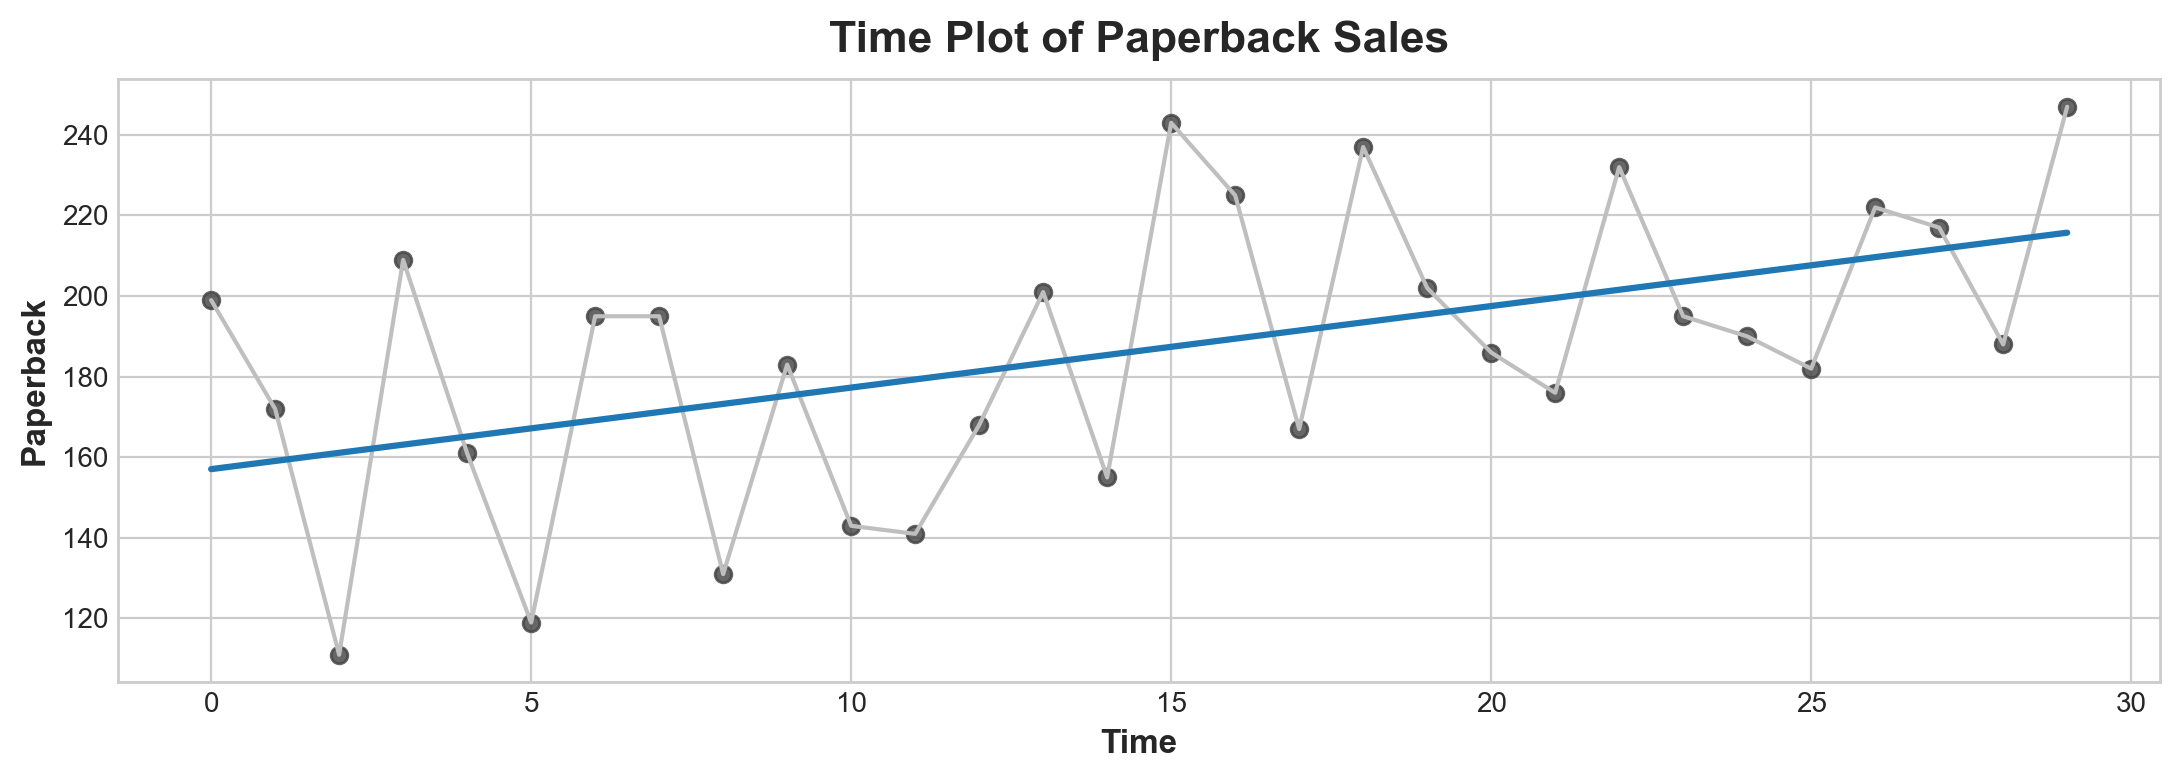

In [52]:
fig, ax = plt.subplots()
ax.plot('Time', 'Paperback', data=dfp, color='0.75')
ax = sns.regplot(x='Time', y='Paperback', data=dfp, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Paperback Sales')

In [29]:
dfh = df.drop(['Paperback'], axis=1)
dfh = dfh.set_index('Date')
dfh.head()


,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


In [32]:
dfh['lag'] = dfh['Hardcover'].shift(1)
dfh = dfh.reindex(columns=['Hardcover','lag'])
dfh.head()

,Hardcover,lag
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

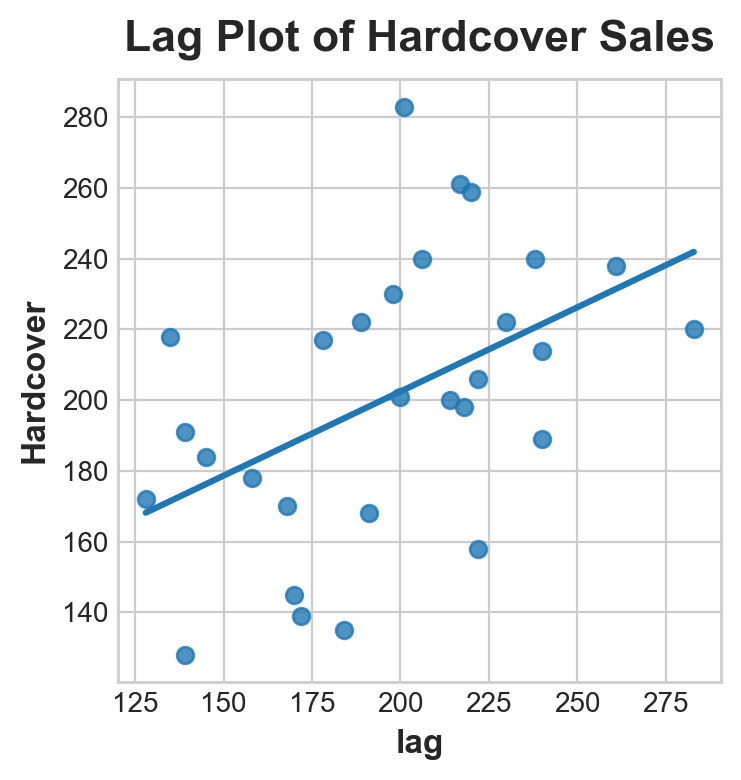

In [35]:
fig, ax = plt.subplots()
ax = sns.regplot(x='lag', y='Hardcover', data=dfh, ci = None)
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales')

In [38]:
dfp = dfp.set_index('Date')
dfp.head()

,Paperback,Time
Date,,
2000-04-01,199,0
2000-04-02,172,1
2000-04-03,111,2
2000-04-04,209,3
2000-04-05,161,4


In [41]:
x = dfp.loc[:, ['Time']]
y = dfp.loc[:, 'Paperback']
model = LinearRegression()
model.fit(x, y)
ypred = pd.Series(model.predict(x), index = dfp.index) # линия регрессии

In [42]:
ypred.head()

Date
2000-04-01    157.064516
2000-04-02    159.087653
2000-04-03    161.110790
2000-04-04    163.133927
2000-04-05    165.157063
dtype: float64

In [47]:
#дает значение коэффициента детерминации R-squared
model.fit(x, y).score(x, y)

0.25198325575699443

In [48]:
#дает значение коэффициентов уравнения регрессии
model.fit(x, y).coef_

array([2.02313682])

In [49]:
#дает значение константы
model.fit(x,y).intercept_

157.06451612903228

так уравнение регрессии будет выглядеть:
y' = 157 + 2*x

Text(0.5, 1.0, 'Time Plot of Paperback books sales')

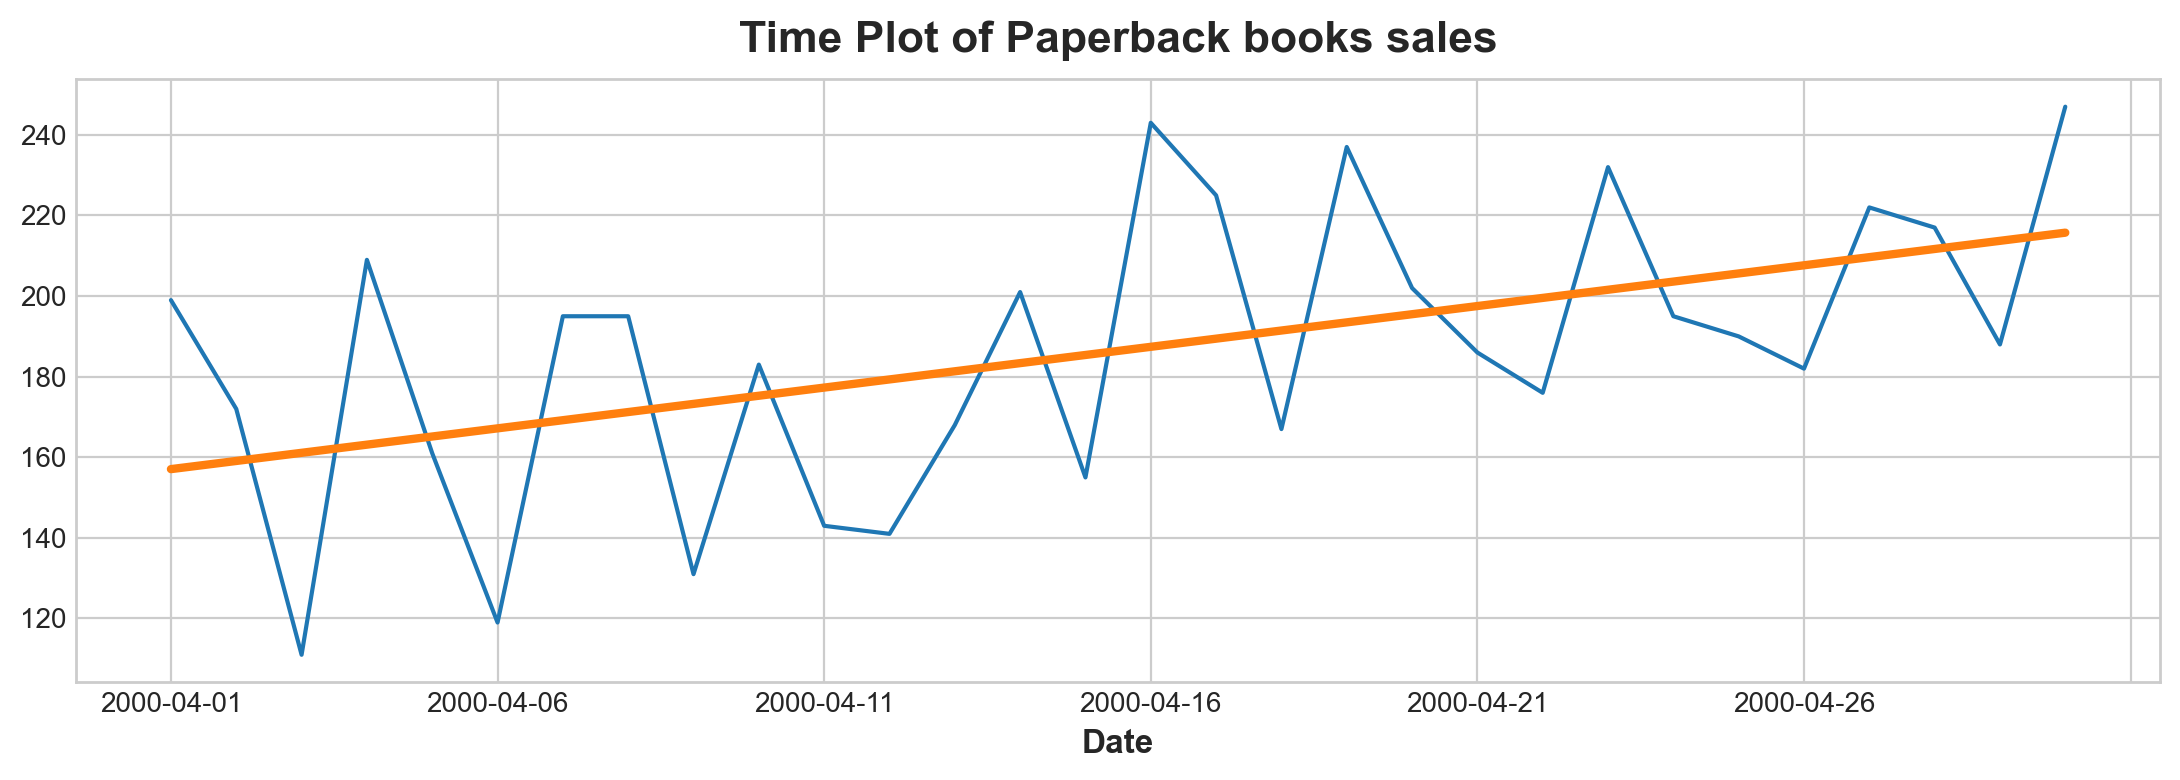

In [51]:
ax = y.plot()
ax = ypred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Paperback books sales')

In [53]:
dfh.head()

,Hardcover,lag
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


In [56]:
x = dfh.loc[:,['lag']]
x.dropna(inplace=True)
y = dfh.loc[:, 'Hardcover']
y, x = y.align(x, join = 'inner')
model = LinearRegression()
model.fit(x, y)
ypred = pd.Series(model.predict(x), index = x.index)

Text(0.5, 1.0, 'Lag Plot of Hardcover books')

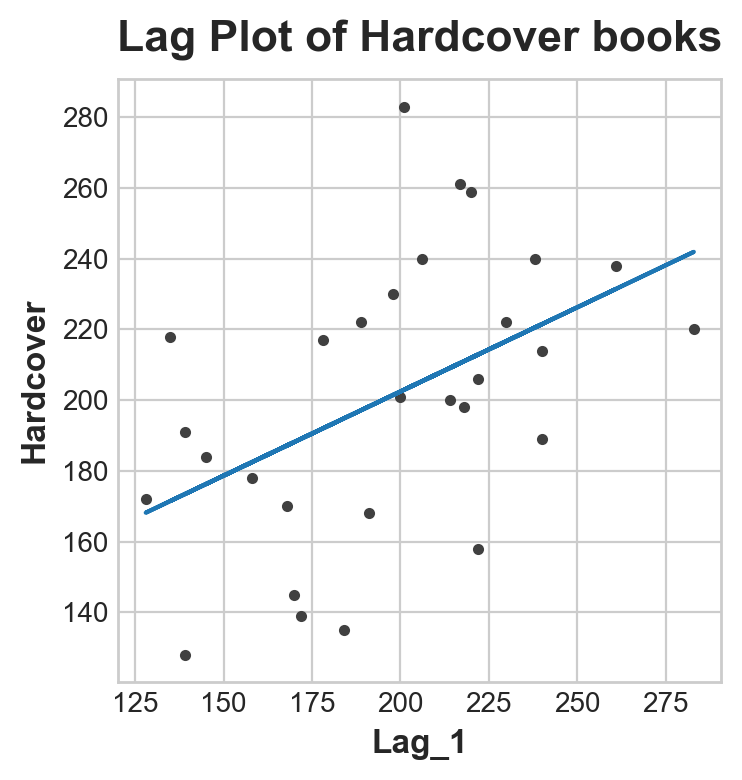

In [59]:
fig, ax = plt.subplots()
ax.plot(x['lag'], y, '.', color='0.25')
ax.plot(x['lag'], ypred)
ax.set_aspect('equal')
ax.set_ylabel('Hardcover')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Hardcover books')